# 🐼 Pandas Explode 💥

## ⬇️ Load Data

The first step is to load the data that contains the list-like columns we want to explode.

In [1]:
# Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Specify the file format explicitly
dataset = load_dataset('csv', data_files='D:/Udemy/Luke/Data Analysis Mastering/Python for Data Analytics/DataSets/data_jobs.csv')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

d:\anaconda3\envs\haroun_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### 1️⃣ Example

#### 🤔 Why `df.explode()` is needed?

> Here's a fake dataset 📊 of 3 job postings 💼.

In [3]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


If we wanted to analyze the skills in this we'd need a minimum of 5 lines of code to get the counts of skills.

In [4]:
df_skills_lists = df_skills.copy()

for row in df_skills_lists.itertuples():
    for skill in row.job_skills:
        df_skills_lists[skill] = df_skills_lists['job_skills'].apply(lambda x : skill in x)
        df_skills_lists[skill] = df_skills_lists[skill].astype(int)

df_skills_lists.loc['Total'] = df_skills_lists.sum()
df_skills_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


However, exploding it out makes the data a lot easier to work with.



In [5]:
df_exploaded = df_skills.explode('job_skills')
df_exploaded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


Now we can perform value_counts and even plot it.



In [6]:
df_exploaded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

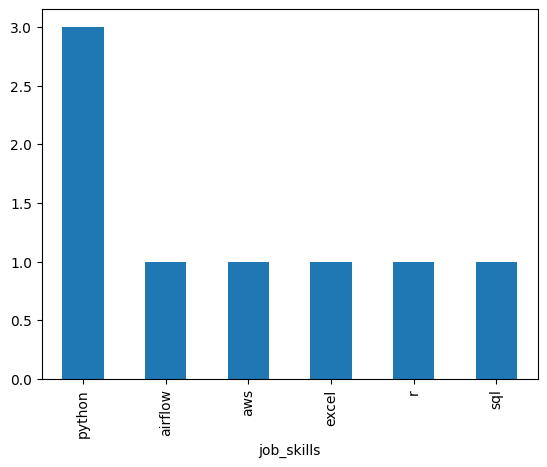

In [7]:
df_exploaded.value_counts('job_skills').plot(kind='bar')

### 💥 explode()

#### 📝 Notes
> `explode()`: Transforms each element of a list-like to a row.
- Expand list-like data within a DataFrame column into separate rows. 📊
- Commonly used to split list data for analysis (hint hint 😉) or when working with JSON data. 🗄️

#### ✅ Example
> Let's transform the list-like elements in the **job_skills** 💼 column into separate rows using the **explode()** function.
>
> This will make it so each skill has its own row, and we'll save this into a new DataFrame called **df_exploded** 🔄.
>
> 🧠 **Reminder:** In the last section, we already prepared our data and converted our `job_skills` column to a list.

In [8]:
import ast

In [9]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


Now we're going to apply the explode() function onto each skill and make each skill have its own row.



In [10]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

Let's look at our new column.

In [11]:
df_exploded['job_skills']

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

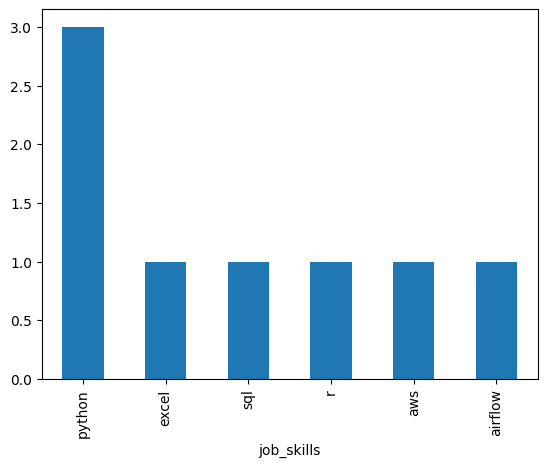

In [12]:
df_exploaded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

1.  🧹 **Clean up the skills.**
    > We already covered this step in our last example.

In [13]:
# Explode job_skills column
df_skills = df_skills.explode('job_skills')

2. Now we'll calculate the skill count for each data job.

In [14]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()

print('Type of skills_count : ',type(skills_count))
skills_count

Type of skills_count :  <class 'pandas.core.series.Series'>


job_skills  job_title_short
airflow     Data Engineer      1
aws         Data Engineer      1
excel       Data Analyst       1
python      Data Analyst       1
            Data Engineer      1
            Data Scientist     1
r           Data Scientist     1
sql         Data Analyst       1
dtype: int64

3. We'll reset_index to transform skills_count from a Series to a DataFrame.


In [15]:
# Name the count column as count

df_skills_count = skills_count.reset_index(name='skill_count') 
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


4. We'll prep for plotting by the data getting in descending order.


In [16]:
df_skills_count.sort_values(by='skill_count' , inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


5. Finally, we'll graph the top 10 skills using a bar chart.


In [17]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
2,excel,Data Analyst,1
3,python,Data Analyst,1
7,sql,Data Analyst,1


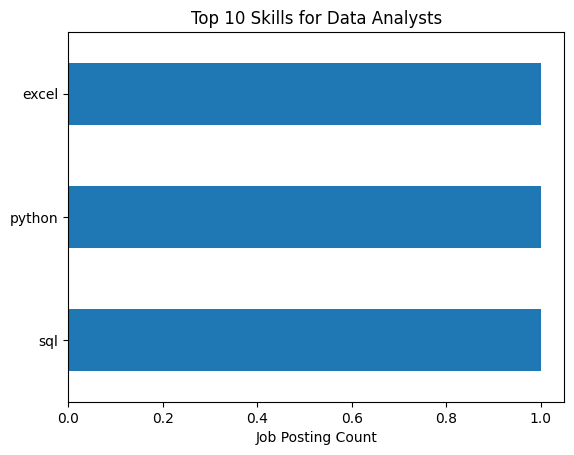

In [18]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()